In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import mixture

In [2]:
train_df = pd.read_csv("./clean_data/clean_train.csv")
test_df = pd.read_csv("./clean_data/clean_test.csv")

In [3]:
train_df.head(4)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0


In [4]:
test_df.head(4)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0


In [5]:
train_df = pd.get_dummies(train_df)
test_df =  pd.get_dummies(test_df)

In [6]:
train_df.head(4)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg,class_pos
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1,0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1,0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,1,0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,1,0


In [7]:
X = train_df = train_df.drop(columns=['class_neg', 'class_pos'], axis=1)
Z = test_df = test_df.drop(columns=['class_neg', 'class_pos'], axis=1)

In [8]:
print(type(X))
X = X.as_matrix()
print(type(Z))
Z = Z.as_matrix()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [9]:
print(type(X))
print(type(Z))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
print(X)
print(Z)

[[7.66980000e+04 7.13188501e-01 2.13070644e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.30580000e+04 7.13188501e-01 0.00000000e+00 ... 1.50000000e+03
  0.00000000e+00 0.00000000e+00]
 [4.10400000e+04 7.13188501e-01 2.28000000e+02 ... 5.14000000e+02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.12000000e+02 0.00000000e+00 2.13070643e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.02920000e+04 7.13188501e-01 2.13070643e+09 ... 3.88422000e+05
  0.00000000e+00 0.00000000e+00]
 [4.02220000e+04 7.13188501e-01 6.98000000e+02 ... 1.58000000e+02
  0.00000000e+00 0.00000000e+00]]
[[6.00000000e+01 0.00000000e+00 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.20000000e+01 0.00000000e+00 6.80000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.60020000e+04 2.00000000e+00 2.12000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.96360000e+04 7.72064889e-01 1.67000000e+03 ... 1.95480000e+04
  0.00000000e+00 0.00000000e+00]

In [11]:
X.shape
Z.shape

(16000, 170)

In [12]:
print(X[1,:])
print(Z[1,:])

[3.30580000e+04 7.13188501e-01 0.00000000e+00 1.90620639e+05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.82540000e+04 6.53294000e+05
 1.72080000e+06 5.16724000e+05 3.16420000e+04 0.00000000e+00
 1.39335200e+06 0.00000000e+00 6.80000000e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.56089800e+06 2.12715000e+06
 1.08459800e+06 3.38544000e+05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.15100000e+04 7.72720000e+05 1.99692400e+06
 9.95600000e+04 0.00000000e+00 7.33600000e+03 7.80800000e+03
 1.37760000e+04 1.30860000e+04 1.01007400e+06 1.87390200e+06
 1.47260000e+04 6.00000000e+00 0.00000000e+00 0.00000000e+00
 1.37857600e+06 4.47166000e+05 1.99512000e+05 1.54298000e+05
 1.37280000e+05 1.38668000e+05 1.65908000e+05 2.29652000e+05
 8.70820000e+04 4.70800000e+03 3.64666000e+06 8.60000000e+01
 4.54000000e+02 3.640000

In [13]:
print(X[:4,:])

[[7.66980000e+04 7.13188501e-01 2.13070644e+09 2.80000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.72500000e+04 1.43286400e+06
  3.66415600e+06 1.00768400e+06 2.58960000e+04 0.00000000e+00
  2.55169600e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.93329600e+06 3.65516600e+06
  1.76600800e+06 1.13204000e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.01200000e+03 2.68000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.69014000e+05 4.23966000e+06 7.03300000e+05
  7.55876000e+05 0.00000000e+00 5.37400000e+03 2.10800000e+03
  4.11400000e+03 1.23480000e+04 6.15248000e+05 5.52627600e+06
  2.37800000e+03 4.00000000e+00 0.00000000e+00 0.00000000e+00
  2.32874600e+06 1.02230400e+06 4.15432000e+05 2.87230000e+05
  3.10246000e+05 6.81504000e+05 1.11881400e+06 3.57400000e+03
  0.00000000e+00 0.00000000e+00 6.70021400e+06 0.00000000e+00
  1.0000

In [14]:
print(X[0:2,0:2])

[[7.66980000e+04 7.13188501e-01]
 [3.30580000e+04 7.13188501e-01]]


In [15]:
print(X[0:2,:])

[[7.66980000e+04 7.13188501e-01 2.13070644e+09 2.80000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.72500000e+04 1.43286400e+06
  3.66415600e+06 1.00768400e+06 2.58960000e+04 0.00000000e+00
  2.55169600e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.93329600e+06 3.65516600e+06
  1.76600800e+06 1.13204000e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.01200000e+03 2.68000000e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.69014000e+05 4.23966000e+06 7.03300000e+05
  7.55876000e+05 0.00000000e+00 5.37400000e+03 2.10800000e+03
  4.11400000e+03 1.23480000e+04 6.15248000e+05 5.52627600e+06
  2.37800000e+03 4.00000000e+00 0.00000000e+00 0.00000000e+00
  2.32874600e+06 1.02230400e+06 4.15432000e+05 2.87230000e+05
  3.10246000e+05 6.81504000e+05 1.11881400e+06 3.57400000e+03
  0.00000000e+00 0.00000000e+00 6.70021400e+06 0.00000000e+00
  1.0000

In [16]:
from sklearn.cluster import KMeans

In [17]:
cluster_range = range( 1, 20 )
cluster_range1 = range( 1, 20 )
cluster_errors = []
cluster_errors1 = []

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
Z_scaled = scaler.fit_transform( Z )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  print("Fazendo cenas")
    
  cluster_errors.append( clusters.inertia_ )

for num_clusters1 in cluster_range1:
  clusters1 = KMeans( num_clusters1 )
  clusters1.fit( Z_scaled )
  clusters.fit( X_scaled )
  print("Também faço cenas")
    
  cluster_errors1.append( clusters1.inertia_ )

Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Fazendo cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas
Também faço cenas


In [18]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters1_df = pd.DataFrame( { "num_clusters":cluster_range1, "cluster_errors": cluster_errors1 } )

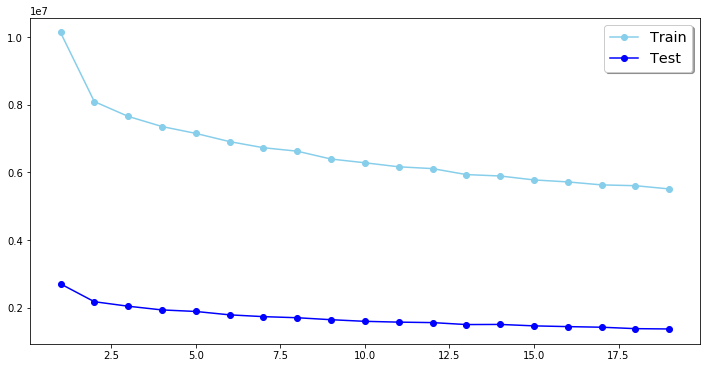

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,color = "skyblue", label='Train')
ax.plot( clusters1_df.num_clusters, clusters1_df.cluster_errors, marker = "o" ,color = "blue", label='Test')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')


In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [25]:
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 0])

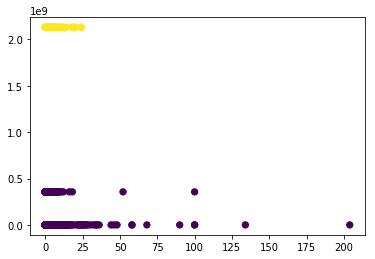

In [26]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)
data_rescaled1 = scaler.fit_transform(Z)

<Figure size 432x288 with 0 Axes>

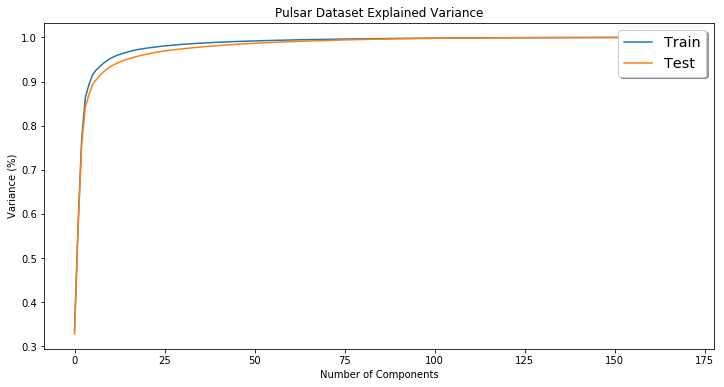

In [34]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
pca1 = PCA().fit(data_rescaled1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.cumsum(pca.explained_variance_ratio_),label='Train')
ax.plot(np.cumsum(pca1.explained_variance_ratio_),label='Test')
ax.set(xlabel='Number of Components', ylabel='Variance (%)') #for each component
ax.set(title='Pulsar Dataset Explained Variance')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

#### o que queremos aqui e o valor de componentes que explica entre 90-99% da variancia... esta tudo ok aqui!! eu escolhi 10 componentes por exemplo...

In [30]:
pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)
dataset1 = pca1.fit_transform(data_rescaled1)

In [31]:
cluster_range = range( 1, 20 )
cluster_errors = []
cluster_range1 = range( 1, 20 )
cluster_errors1 = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( dataset )
  cluster_errors.append( clusters.inertia_ )

for num_clusters1 in cluster_range1:
  clusters1 = KMeans( num_clusters1 )
  clusters1.fit( Z_scaled )
    
  cluster_errors1.append( clusters1.inertia_)

In [37]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [37]:
clusters_df_pca = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df_pca1 = pd.DataFrame( { "num_clusters":cluster_range1, "cluster_errors": cluster_errors1 } )

<Figure size 432x288 with 0 Axes>

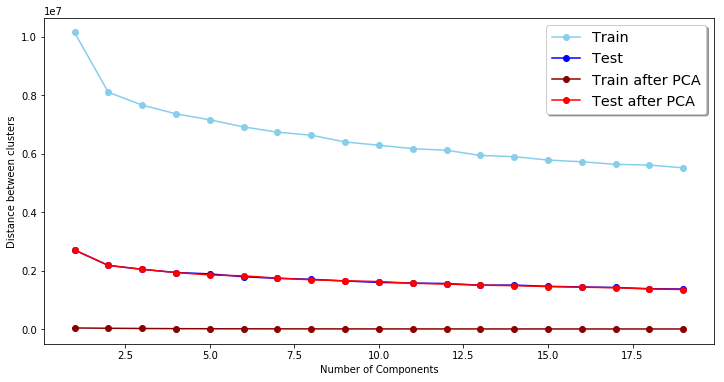

In [39]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,color = "skyblue",label='Train' )
ax.plot( clusters1_df.num_clusters, clusters1_df.cluster_errors, marker = "o" ,color = "blue",label='Test')
ax.plot( clusters_df_pca.num_clusters, clusters_df_pca.cluster_errors, marker = "o" ,color = "darkred",label='Train after PCA')
ax.plot( clusters_df_pca1.num_clusters, clusters_df_pca1.cluster_errors, marker = "o" ,color = "red" ,label='Test after PCA')
ax.set(xlabel='Number of Components')
ax.set(ylabel='Distance between clusters') #for each component
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset)

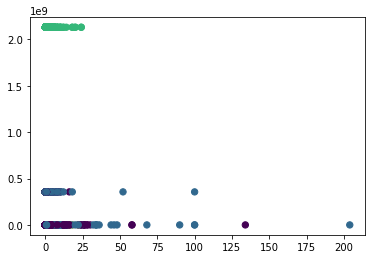

In [32]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

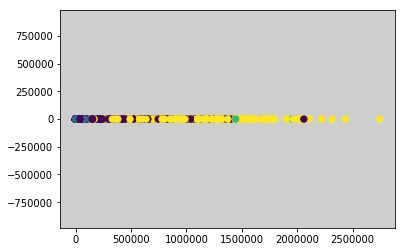

In [33]:
plot_kmeans(kmeans, X)

In [34]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(170,2))

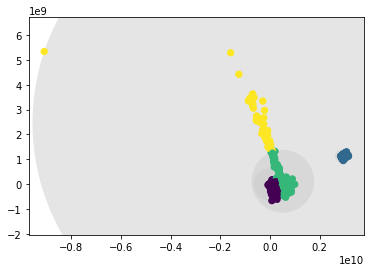

In [35]:
plot_kmeans(kmeans, X_stretched)

### Modelos de mistura - corrigir de forma a dar para mais componentes


In [66]:
gmm =  mixture.GaussianMixture(n_components=1).fit(X)

In [39]:
labels = gmm.predict(X)

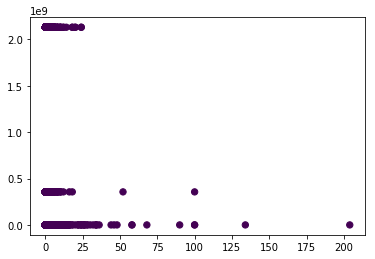

In [40]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [41]:
probs = gmm.predict_proba(X)

In [42]:
print(probs[:5].round(3))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [43]:
print(probs[5:10].round(3))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [44]:
print(probs[150:155].round(3))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [45]:
print(probs[75:80].round(3))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [46]:
size = 50 * probs.max(1)

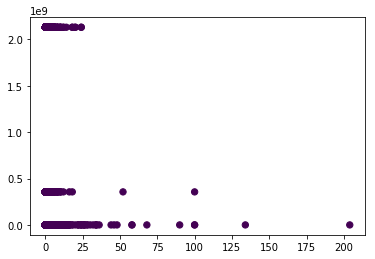

In [47]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [48]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', random_state=42)

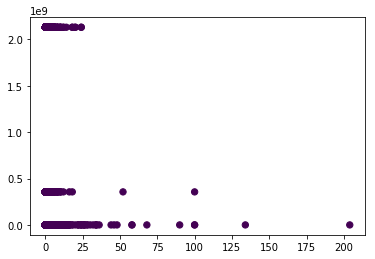

In [49]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [50]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

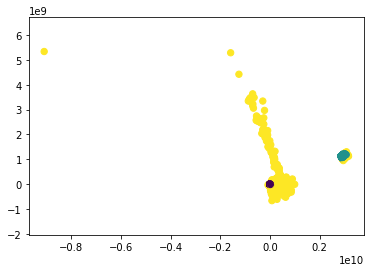

In [51]:
plot_gmm(gmm, X_stretched)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

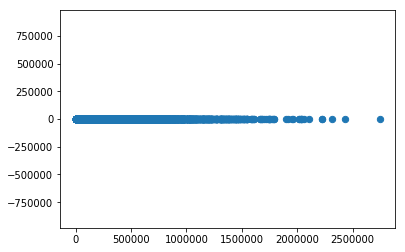

In [55]:
plot_gmm(gmm, X, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

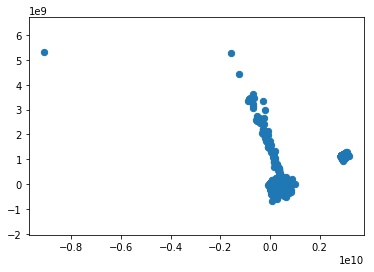

In [56]:
plot_gmm(gmm, X_stretched, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

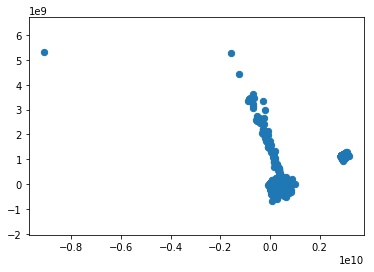

In [57]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X_stretched, label=False)

In [63]:
reg_covar = [0.0, 1.0e-12, 1.0e-10, 1.0e-8, 1.0e-6, 1.0e-4, 1.0e-2]
prob = np.zeros((len(reg_covar), len(X)))
for i in range(1, len(reg_covar)):

    n_components = np.arange(1, 21)
    models = [mixture.GaussianMixture(n_components=1, covariance_type='full', reg_covar = reg_covar[i]).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

KeyboardInterrupt: 